# <font size=6 color='green'><center>**IT 496 - Introduction to Data Mining**</center></font>
### **<center>Course Project - 02<br/><br/>Data Preprocessing, EDA and Classification Analysis<center>**

 &emsp; **Group Name : <font color='#0099ff'>DataForce</font>** <br/>
 &emsp; **Group ID : <font color='#0099ff'>T06</font>**
 <br/>&emsp; **Dateset : <font color='#0099ff'>IP Network Traffic Flows</font>**

### <center>Introduction </center>

### <center>Exploratory Data Analysis</center>

In [35]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [78]:
# the path of the csv file
csv_file_path = "C:\\Users\\rajini bopparam\\sem_7\\IT496\\Project\\Dataset-Unicauca-Version2-87Atts.csv"
Data = pd.read_csv(csv_file_path)

Data.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [18]:
Data.shape

(3577296, 87)

In [19]:
Data = Data[0:100]

The dataset contains $35,77,296$rows and $87$columns.

In [20]:
Data.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

In [21]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 87 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow.ID                      100 non-null    object 
 1   Source.IP                    100 non-null    object 
 2   Source.Port                  100 non-null    int64  
 3   Destination.IP               100 non-null    object 
 4   Destination.Port             100 non-null    int64  
 5   Protocol                     100 non-null    int64  
 6   Timestamp                    100 non-null    object 
 7   Flow.Duration                100 non-null    int64  
 8   Total.Fwd.Packets            100 non-null    int64  
 9   Total.Backward.Packets       100 non-null    int64  
 10  Total.Length.of.Fwd.Packets  100 non-null    int64  
 11  Total.Length.of.Bwd.Packets  100 non-null    float64
 12  Fwd.Packet.Length.Max        100 non-null    int64  
 13  Fwd.Packet.Length.Min

Most of the attributes are of numeric type, except a few nominal attributes like ProtocolName, Label,

In [23]:
Data.describe()

,Source.Port,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
count,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.00000,1.000000e+02,100.000000,100.000000,...,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000
mean,28149.460000,20990.670000,6.0,129294.700000,18.210000,26.870000,7138.99000,4.233623e+04,748.840000,3.750000,...,24.440000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.790000
std,25231.676426,24566.579619,0.0,165577.964716,41.819066,99.229828,36825.41646,1.903031e+05,1180.910817,10.832401,...,5.822839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.690129
min,80.000000,80.000000,6.0,1.000000,1.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,...,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000
25%,3128.000000,1981.500000,6.0,96.250000,2.000000,0.000000,12.00000,0.000000e+00,6.000000,0.000000,...,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000
50%,37463.000000,3128.000000,6.0,43611.500000,5.000000,0.000000,769.00000,0.000000e+00,287.500000,0.000000,...,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.000000
75%,54173.000000,50266.750000,6.0,244107.500000,9.000000,6.250000,2168.00000,1.987500e+03,992.000000,6.000000,...,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.000000
max,62803.000000,57743.000000,6.0,671266.000000,277.000000,587.000000,313554.00000,1.217608e+06,5840.000000,63.000000,...,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.000000


Plotting the correlation matrix

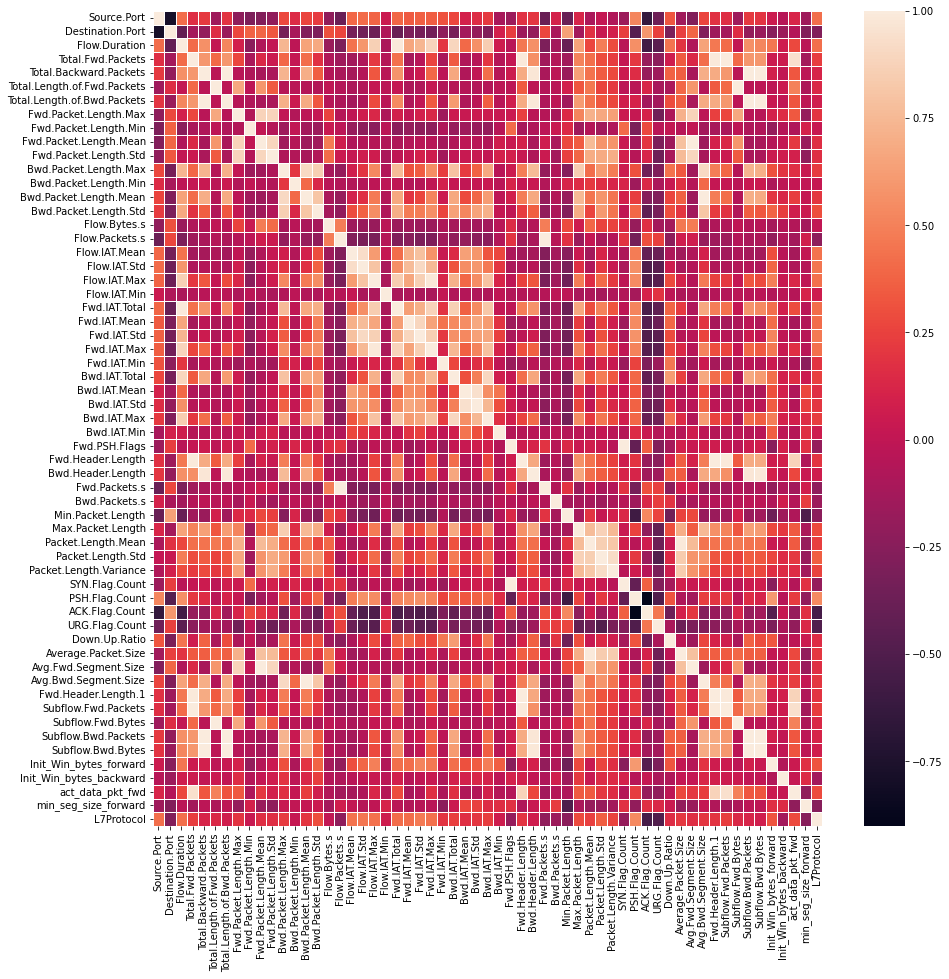

In [44]:
numeric_data = Data.select_dtypes(include =[np.number]) # keep only numerical columns
numeric_data = numeric_data[[col for col in numeric_data if numeric_data[col].nunique() > 1]]
corr_matrix = numeric_data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(data = corr_matrix, lw=1)
plt.show()

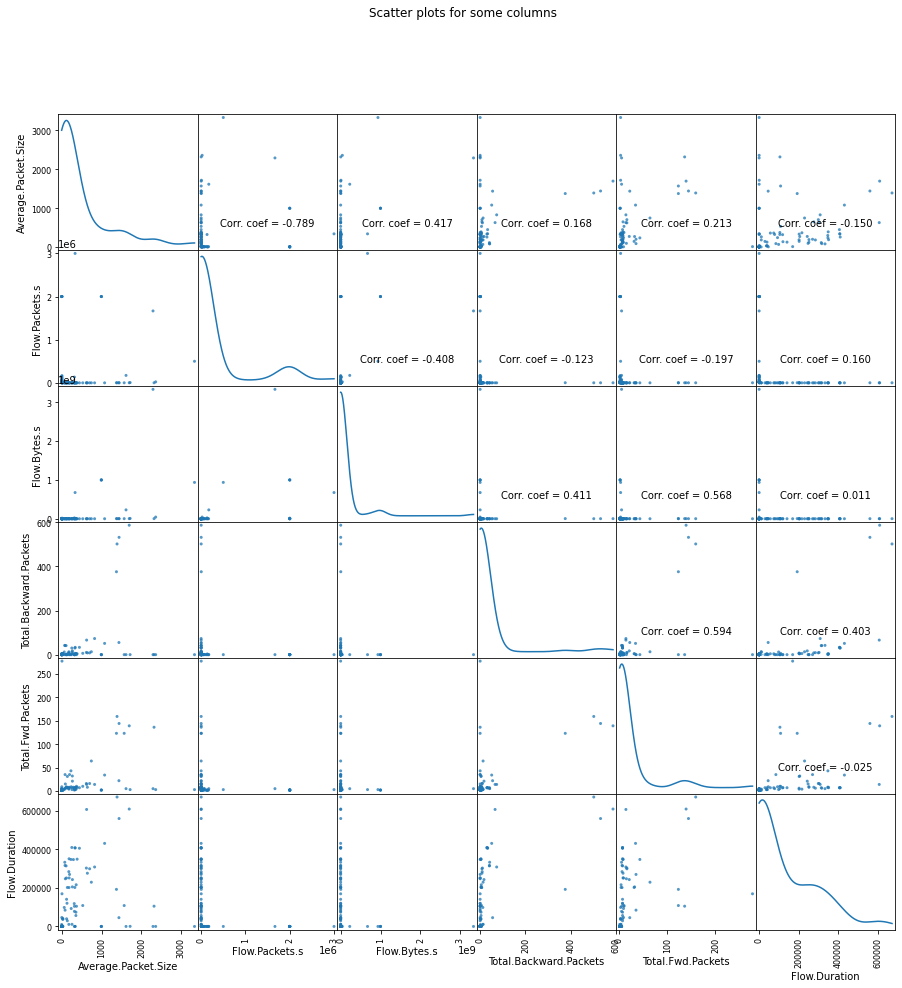

In [60]:
ipMeasureColumns = ['Average.Packet.Size','Flow.Packets.s','Flow.Bytes.s','Total.Backward.Packets','Total.Fwd.Packets','Flow.Duration']

ax = pd.plotting.scatter_matrix(Data[ipMeasureColumns], alpha=0.75, figsize=[15,15], diagonal='kde')
corrs = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
    ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.5, 0.2), xycoords='axes fraction', ha='center', va='center')
plt.suptitle('Scatter plots for some columns')
plt.show()

There is no high correlation between any of thes columns

In [65]:
uniqueProtocols=Data['ProtocolName'].unique()
print(uniqueProtocols)

['HTTP_PROXY' 'HTTP' 'HTTP_CONNECT' 'SSL' 'GOOGLE' 'YOUTUBE']


Lets see the distribution of these protocols

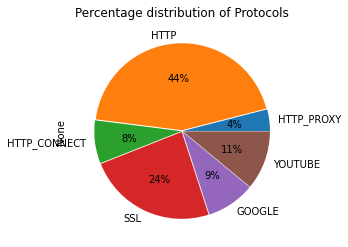

In [69]:
Data.groupby('ProtocolName').size().plot(kind='pie',autopct='%1.0f%%', explode=[0.01]*len(uniqueProtocols),title='Percentage distribution of Protocols',labels=uniqueProtocols)
plt.show()

We can see that most of the ip flows are using HTTP Protocol!!

In [72]:
Data['Label'].unique()

array(['BENIGN'], dtype=object)

The label attribute has only a single value for all examples and thus not so useful in classification analysis!!. Hence, it can be ignored

In [74]:
Data['Timestamp']

0     26/04/201711:11:17
1     26/04/201711:11:17
2     26/04/201711:11:17
3     26/04/201711:11:17
4     26/04/201711:11:17
             ...        
95    26/04/201711:11:18
96    26/04/201711:11:18
97    26/04/201711:11:18
98    26/04/201711:11:18
99    26/04/201711:11:18
Name: Timestamp, Length: 100, dtype: object

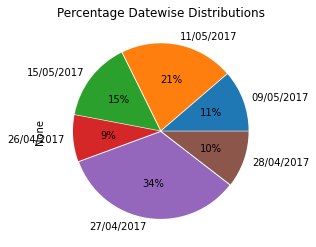

In [95]:
def getDateFromTimeStamp(timestamp):
    return timestamp[0:10]

df=Data
df['Timestamp']=df['Timestamp'].apply(getDateFromTimeStamp)
df.groupby('Timestamp').size().plot(kind='pie',autopct='%1.0f%%', explode=[0.01]*6,title='Percentage Datewise Distributions')
plt.show()

The above plot shows the distribution of data recoreded on 6 days.

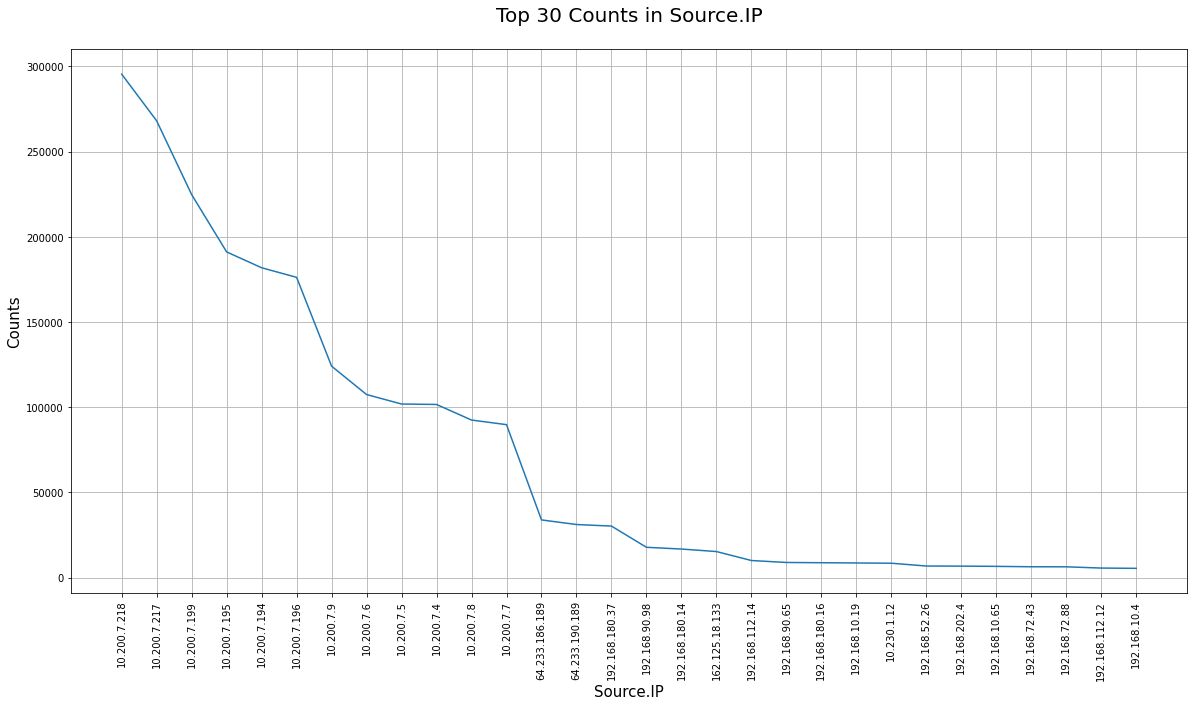

In [98]:
sourceIPCounts = pd.DataFrame(Data['Source.IP'].value_counts()[:30])
plt.figure(figsize=(20,10))
plt.plot(sourceIPCounts)
# to display the ip address verticall
plt.xticks(rotation=90)
plt.xlabel('Source.IP', {'fontsize':15})
plt.ylabel('Counts', {'fontsize':15})
plt.title('Top 30 Counts in Source.IP\n', {'fontsize':20})
plt.grid()

These are the 30 most soucre IP addresses recorded with corresponding frequencies

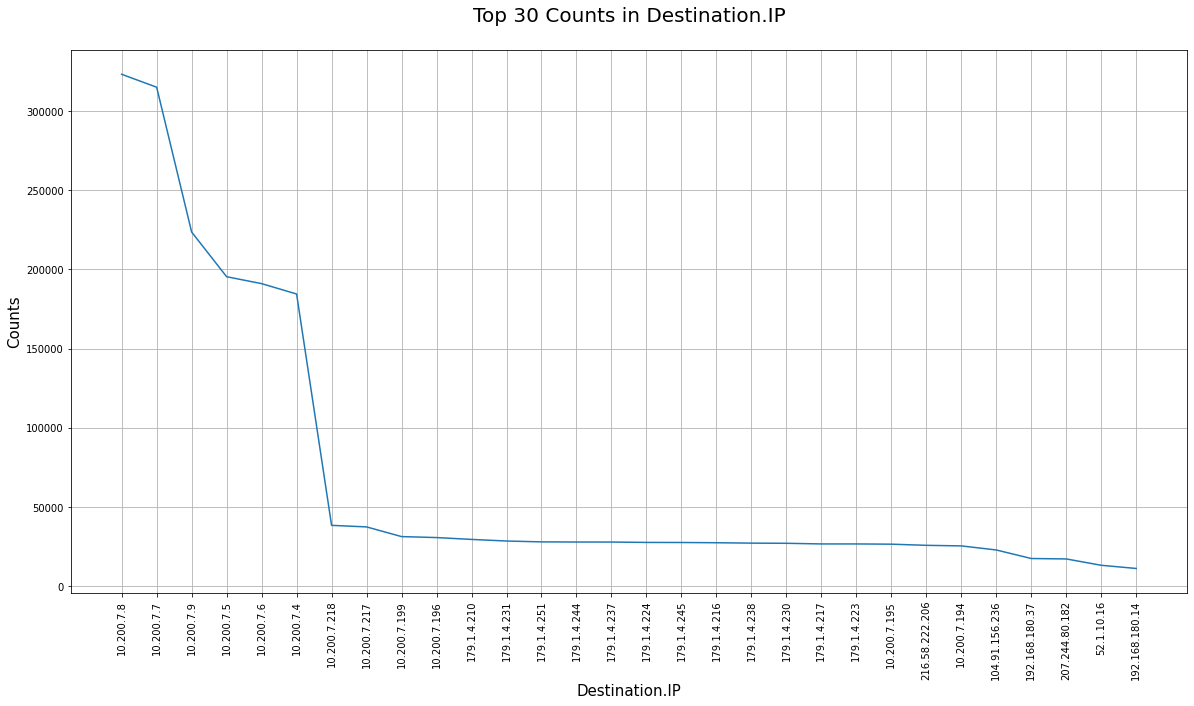

In [101]:
DestIpCounts = pd.DataFrame(Data['Destination.IP'].value_counts()[:30])
plt.figure(figsize=(20,10))
plt.plot(DestIpCounts)
# to display the ip address verticall
plt.xticks(rotation=90)
plt.xlabel('Destination.IP', {'fontsize':15})
plt.ylabel('Counts', {'fontsize':15})
plt.title('Top 30 Counts in Destination.IP\n', {'fontsize':20})
plt.grid()

Similary 30 top destination addresses